<a href="https://colab.research.google.com/github/Koalananas/pythonfordata/blob/master/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
from sklearn.metrics import plot_confusion_matrix

In [4]:
labels = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/features.txt", header=None)
l = labels[0].tolist()
labels = []
i = 0
for la in l:
  i += 1
  la = la.replace(" ", "")
  while(la in labels):
    la = la+"x"
  labels.append(la)

train_x = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/Train/X_train.txt"," ", header=None, names=labels)
train_y = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/Train/y_train.txt"," ", header=None, names=['y_target'])
train  = pd.concat([train_x, train_y], axis=1)

test_x = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/Test/X_test.txt"," ", header=None, names=labels)
test_y = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/Test/y_test.txt"," ", header=None, names=['y_target'])
test  = pd.concat([test_x, test_y], axis=1)

df = pd.concat([train, test])
df.shape

(10929, 562)

In [0]:
#test correlation matrix
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
def svm(trainx, trainy, testx, testy):
  from sklearn import svm
  clf = svm.SVC(gamma=0.001, C=100., decision_function_shape='ovr')
  clf.fit(trainx, trainy.values.ravel())
  predictions = clf.predict(testx)
  i = 0
  accuracy =0
  for res in predictions:
    if res == testy.loc[i, "y_target"]:
      accuracy +=1
    i+=1
  accuracy = (accuracy/i)
  return [clf, accuracy]

svm(train_x, train_y, test_x, test_y)[1]

0.9535104364326376

In [0]:
def rfc(trainx, trainy, testx, testy):
  from sklearn.ensemble import RandomForestClassifier
  rfc = RandomForestClassifier(n_estimators = 100)
  rfc.fit(trainx,trainy.values.ravel())
  predictions = rfc.predict(testx)
  i = 0
  accuracy =0
  for res in predictions:
    if res == testy.loc[i, "y_target"]:
      accuracy +=1
    i+=1
  accuracy = (accuracy/i)
  return [rfc, accuracy]

rfc(train_x, train_y, test_x, test_y)[1]

0.9152435167615434

In [13]:
def logreg(trainx, trainy, testx, testy):
  from sklearn.linear_model import LogisticRegression
  time_start = time.clock()
  logres = LogisticRegression(solver='lbfgs', multi_class="ovr", max_iter=1000)
  logres.fit(trainx, trainy.values.ravel())
  predictions = logres.predict(testx)
  i = 0
  accuracy =0
  for res in predictions:
    if res == testy.loc[i, "y_target"]:
      accuracy +=1
    i+=1
  accuracy = (accuracy/i)
  time_elapsed = (time.clock() - time_start)
  confusion_matrix(testy, predictions)
  return [logres, accuracy, time_elapsed]

logreg(train_x, train_y, test_x, test_y)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='ovr', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), 0.9468690702087287, 74.66554]

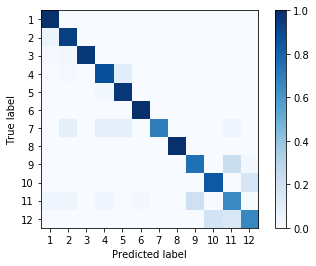

In [30]:
logres = logreg(train_x, train_y, test_x, test_y)[0]
disp = plot_confusion_matrix(logres, test_x, test_y,
  cmap=plt.cm.Blues,
  normalize="true",include_values=False)

In [0]:
modellog = logreg(train_x, train_y, test_x, test_y)[0]
with open("pythonfordata/models/model", 'wb') as file:
            pickle.dump(modellog, file)